In [3]:
import numpy as np
import pandas as pd
df1=pd.read_csv('Datasets/Combined Data.csv',index_col=0)
df1.rename(columns={'statement':'text'},inplace=True)
df1.insert(2,'label',0,True)
for i in range(0,len(df1['status'])):
    if(df1['status'][i] != 'Normal'):
        df1['label'][i]=1
df1.drop(['status'],axis=1,inplace=True)
df1.head(3324)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,text,label
0,oh my gosh,1
1,"trouble sleeping, confused mind, restless hear...",1
2,"All wrong, back off dear, forward doubt. Stay ...",1
3,I've shifted my focus to something else but I'...,1
4,"I'm restless and restless, it's been a month n...",1
...,...,...
3319,Want a syringe,0
3320,please continue to sleep again,0
3321,I said these betoi2. If I'm the education mini...,0
3322,Aurel announced that her pregnancy was endorse...,0


In [3]:
df2=pd.read_csv('Datasets/depression_detection.csv')
df2.head()


,text,label
0,Open discussion. Between the Transfer Portal a...,1
1,Plenty of things are changing in my life and t...,1
2,I feel a little hopeless. Anyone else? #hopele...,1
3,"Which is more healthy? Hope, or hopelessness? ...",1
4,So someone tell me how do I get over #HOPELESS...,1


In [5]:
df3=pd.read_csv('Datasets/mental_health.csv')
df3.tail()


,text,label
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1
27976,got nudes person might might know snapchat do ...,0


In [7]:
df4=pd.read_csv('Datasets/IPD_Reddit_Dataset.csv')
df4.rename(columns={'depression':'label'},inplace=True)
df4.head()


,text,label
0,I love him,0
1,I got accepted into a Graduate program I wante...,0
2,our film production professor gave us our midt...,0
3,Just got done speaking with the inspector for ...,0
4,so i'm nonbinary and despite knowing that most...,0


In [9]:
df5=pd.read_csv('Datasets/Suicide_Detection.csv')
df5.insert(2,'label',0,True)
for i in range(0,len(df5['class'])):
    if(df5['class'][i] == 'suicide'):
        df5['label'][i]=1
df5 = df5.drop(columns=["Unnamed: 0"])

df5.drop(['class'],axis=1,inplace=True)
df5.head()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1


In [10]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df.head()
x=df['text']
y=df['label']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train=x_train.astype(str)
x_test=x_test.astype(str)

(285579,)
(71395,)
(285579,)
(71395,)


In [15]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [17]:
#Tokenizing
tokenizer=Tokenizer(lower=True)
tokenizer.fit_on_texts(x_train)
x_train=tokenizer.texts_to_sequences(x_train)
max_len=100  #max_len represents the length of each row in padded sequence
x_train=pad_sequences(x_train,maxlen=max_len,padding='post')
x_test=tokenizer.texts_to_sequences(x_test)
x_test=pad_sequences(x_test,maxlen=max_len,padding='post')
vocab_size=len(tokenizer.word_index)+1 #Represents the number of words in the texts.
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

In [19]:
import numpy as np
from numpy import asarray
from numpy import zeros
embeddings_dictionary=dict()
glove_file=open('glove.42B.300d.txt',encoding="utf8")
for line in glove_file:
    records=line.split()
    word=records[0]
    vector_dimensions=asarray(records[1:],dtype='float32')
    embeddings_dictionary[word]=vector_dimensions
glove_file.close()

In [21]:
print(embeddings_dictionary[word])
embedding_matrix=zeros((vocab_size,300))
for word, index in tokenizer.word_index.items():
    embedding_vector=embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector
print(embedding_matrix.shape)
print(embedding_matrix[0])

[-0.11969    0.1602    -0.24917    0.12878   -0.19874    0.44684
  0.43726   -0.1943     0.013091   0.043389  -0.14589   -0.35991
 -0.034873  -0.44344   -0.13404   -0.096952   0.20621   -0.1439
 -0.0033411  0.23557   -0.01134   -0.080737  -0.056891  -0.12781
  0.43218    0.0090635  0.035958   0.070213   0.14113    0.11309
  0.14787    0.22466   -0.082153   0.097319  -0.21206   -0.25644
  0.04528    0.24203   -0.24572    0.16853   -0.2641     0.16425
  0.18171   -0.050493  -0.20969   -0.043564  -0.043627  -0.038104
 -0.0090871 -0.39152    0.083001  -0.12174    0.22382   -0.17588
 -0.11067   -0.013021  -0.3337    -0.10227   -0.03196    0.28049
 -0.073983   0.22665    0.082655   0.16785   -0.24602   -0.040421
 -0.023705  -0.012314   0.16754    0.17192   -0.2625    -0.18317
 -0.26723    0.0673     0.064148   0.37196    0.049488  -0.18392
 -0.018638  -0.14565   -0.36355    0.47322    0.067461   0.1984
  0.045388  -0.016077   0.20864    0.18339   -0.18341    0.0066028
  0.15325    0.24125   

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM, SimpleRNN,Embedding,Activation, Flatten
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences 
import numpy as np
from tensorflow.keras import backend as K

In [25]:
def lstm():
    model=Sequential()
    model.add(Embedding(vocab_size,300,weights=[embedding_matrix],name="embedding",trainable=False))
    model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc',tensorflow.keras.metrics.Precision(name='precision'),tensorflow.keras.metrics.Recall(name='recall')])
    model.summary()
    return model
lstmmodel=lstm()
lstmmodelhistory=lstmmodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    74,073,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,073,000 (282.57 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 74,073,000 (282.57 MB)

Epoch 1/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 341s 47ms/step - acc: 0.8205 - loss: 0.3981 - precision: 0.8315 - recall: 0.8281 - val_acc: 0.9156 - val_loss: 0.2176 - val_precision: 0.9119 - val_recall: 0.9292
Epoch 2/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 331s 46ms/step - acc: 0.9156 - loss: 0.2193 - precision: 0.9175 - recall: 0.9233 - val_acc: 0.9271 - val_loss: 0.1918 - val_precision: 0.9235 - val_recall: 0.9392
Epoch 3/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 330s 46ms/step - acc: 0.9255 - loss: 0.1950 - precision: 0.9268 - recall: 0.9326 - val_acc: 0.9319 - val_loss: 0.1790 - val_precision: 0.9348 - val_recall: 0.9359
Epoch 4/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 335s 47ms/step - acc: 0.9311 - loss: 0.1787 - precision: 0.9329 - recall: 0.9369 - val_acc: 0.9343 - val_loss: 0.1725 - val_precision: 0.9362 - val_recall: 0.9390
Epoch 5/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 738s 103ms/step - acc: 0.9361 - loss: 0.1666 - precision: 0.9368 - recall: 0.9427 - val_acc: 0.9347 - val_loss: 0.1704 - val_precision: 0.

In [27]:
score=lstmmodel.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 99s 44ms/step - acc: 0.9388 - loss: 0.1669 - precision: 0.9433 - recall: 0.9424
Test Score: 0.17068006098270416
Test Accuracy: 0.9372645020484924


In [216]:
print(lstmmodelhistory.history.keys())

dict_keys(['acc', 'loss', 'precision', 'recall', 'val_acc', 'val_loss', 'val_precision', 'val_recall'])


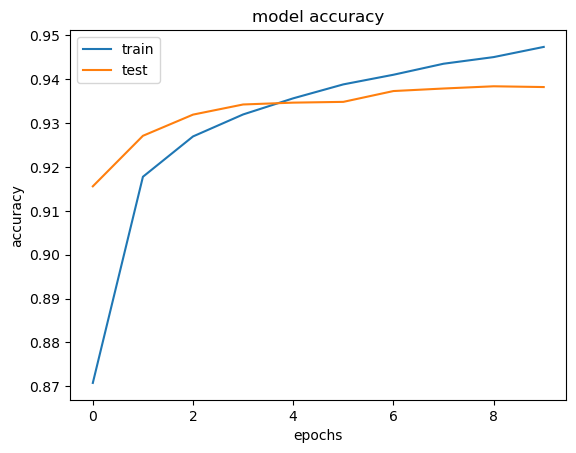

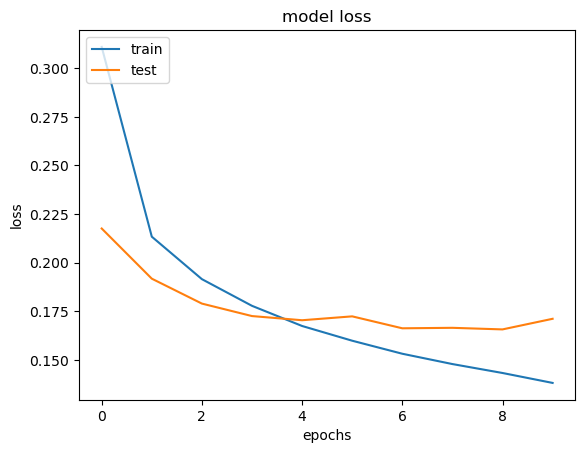

In [29]:
import matplotlib.pyplot as plt
plt.plot(lstmmodelhistory.history['acc'])
plt.plot(lstmmodelhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(lstmmodelhistory.history['loss'])
plt.plot(lstmmodelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [65]:
#predictions on test data
predictions = lstmmodel.predict(x_test)

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step


In [66]:
#Comparision of predicted values and desired values

print(predictions.shape)
predicted_classes = (predictions > 0.5).astype(int)
print(type(predicted_classes))
y_test_predict=asarray(y_test[0:],dtype=int)
count=0
for i in range(0,50,1):
    print(predicted_classes[i],"\t",y_test_predict[i])
    if(predicted_classes[i] != y_test_predict[i]):
        count+=1
print("Total false predictions are:",count)

(71395, 1)
<class 'numpy.ndarray'>
[1] 	 1
[0] 	 0
[0] 	 0
[0] 	 0
[0] 	 0
[0] 	 0
[0] 	 0
[1] 	 0
[1] 	 1
[1] 	 1
[1] 	 1
[0] 	 0
[1] 	 1
[1] 	 1
[0] 	 0
[0] 	 0
[0] 	 0
[1] 	 1
[0] 	 0
[1] 	 1
[1] 	 1
[1] 	 1
[1] 	 1
[0] 	 0
[0] 	 0
[1] 	 1
[1] 	 1
[0] 	 0
[1] 	 1
[0] 	 0
[1] 	 1
[0] 	 0
[0] 	 0
[1] 	 1
[1] 	 1
[0] 	 0
[0] 	 0
[1] 	 1
[1] 	 1
[1] 	 1
[0] 	 0
[1] 	 1
[1] 	 1
[0] 	 0
[0] 	 0
[0] 	 1
[1] 	 1
[0] 	 0
[1] 	 1
[1] 	 1
Total false predictions are: 2


In [149]:
#Prediction on new and unseen data
comment=input()
new_data = ["I am not having a good time"]  # Example input
new_sequences = tokenizer.texts_to_sequences(new_data)  # Tokenize the input
new_padded = pad_sequences(new_sequences, maxlen=max_len,padding='post')  # Pad the sequence

# Predict
new_predictions = lstmmodel.predict(new_padded)

new_predictions=(new_predictions>0.5).astype(int)
if(new_predictions[0] == 1):
    print("This is a Depressive Statement")
else:
    print("This is a non Depressive Statement")

 d


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is a non Depressive Statement


In [133]:
lstmmodel.save('lstm_textualdata.keras')
lstmmodel.save('lstm_textualdata.h5')


In [29]:
def gru():
    model=Sequential()
    model.add(Embedding(vocab_size,300,weights=[embedding_matrix],name="embedding",trainable=False))
    model.add(GRU(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=False))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc',tensorflow.keras.metrics.Precision(name='precision'),tensorflow.keras.metrics.Recall(name='recall')])
    model.summary()
    return model
grumodel=gru()
grumodelhistory=grumodel.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    73,844,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,844,100 (281.69 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 73,844,100 (281.69 MB)

Epoch 1/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 678s 94ms/step - acc: 0.6510 - loss: 3967.3469 - precision: 0.5974 - recall: 0.7174 - val_acc: 0.4769 - val_loss: 0.6802 - val_precision: 0.5297 - val_recall: 0.8501
Epoch 2/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 723s 101ms/step - acc: 0.5293 - loss: 2333.6663 - precision: 0.5230 - recall: 0.6496 - val_acc: 0.4990 - val_loss: 0.6589 - val_precision: 0.5426 - val_recall: 0.8773
Epoch 3/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 600s 84ms/step - acc: 0.5592 - loss: 13618.3574 - precision: 0.5391 - recall: 0.5929 - val_acc: 0.4907 - val_loss: 0.6760 - val_precision: 0.5339 - val_recall: 0.8585
Epoch 4/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 592s 83ms/step - acc: 0.5982 - loss: 8397.4385 - precision: 0.5785 - recall: 0.6539 - val_acc: 0.6659 - val_loss: 0.6468 - val_precision: 0.5480 - val_recall: 0.9168
Epoch 5/10
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 592s 83ms/step - acc: 0.6397 - loss: 7095.0190 - precision: 0.6270 - recall: 0.6416 - val_acc: 0.6676 - val_loss: 0.6317 - v

In [31]:
score=grumodel.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - acc: 0.6525 - loss: 0.6447
Test Score: 0.6451759934425354
Test Accuracy: 0.6520764827728271


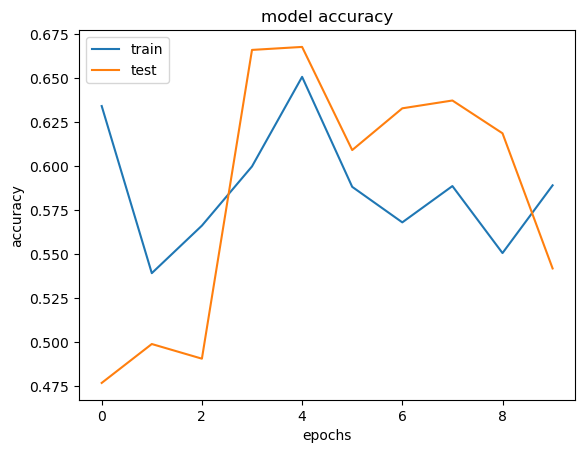

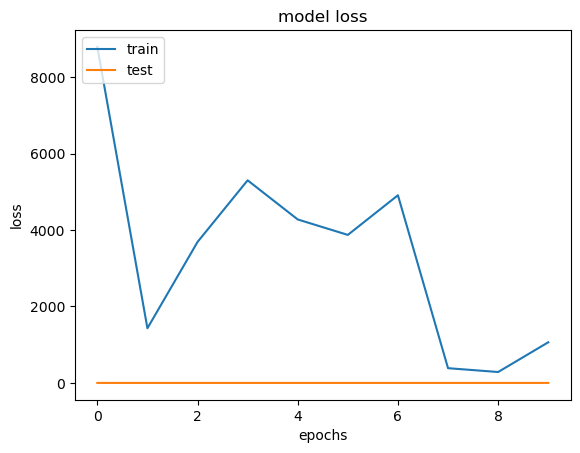

In [31]:
import matplotlib.pyplot as plt
plt.plot(grumodelhistory.history['acc'])
plt.plot(grumodelhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(grumodelhistory.history['loss'])
plt.plot(grumodelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [35]:
#predictions on test data
predictions = grumodel.predict(x_test)
#Comparision of predicted values and desired values

print(predictions.shape)
predicted_classes = (predictions > 0.5).astype(int)
print(type(predicted_classes))
y_test_predict=asarray(y_test[0:],dtype=int)
count=0
for i in range(0,50,1):
    print(predicted_classes[i],"\t",y_test_predict[i])
    if(predicted_classes[i][0] != y_test_predict[i][0]):
        count+=1
print("Total false predictions are:",count)

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step
(71395, 2)
<class 'numpy.ndarray'>
[1 0] 	 [1 0]
[1 1] 	 [1 0]
[0 0] 	 [0 1]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [0 1]
[1 1] 	 [0 1]
[1 0] 	 [0 1]
[1 1] 	 [0 1]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 0] 	 [1 0]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 0] 	 [1 0]
[1 0] 	 [1 0]
[1 0] 	 [0 1]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 1] 	 [0 1]
[0 1] 	 [1 0]
[1 1] 	 [1 0]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 1] 	 [0 1]
[1 0] 	 [1 0]
[1 0] 	 [1 0]
[1 1] 	 [1 0]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 0] 	 [1 0]
[0 0] 	 [1 0]
[1 1] 	 [1 0]
[1 1] 	 [1 0]
[1 1] 	 [0 1]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 0] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [0 1]
[1 1] 	 [1 0]
[1 1] 	 [1 0]
[1 1] 	 [0 1]
[1 1] 	 [0 1]
[0 0] 	 [1 0]
[0 1] 	 [0 1]
Total false predictions are: 22


In [45]:
#Prediction on new and unseen data

new_data = ["I am was happy but now I am sad"]  # Example input
new_sequences = tokenizer.texts_to_sequences(new_data)  # Tokenize the input
new_padded = pad_sequences(new_sequences, maxlen=max_len,padding='post')  # Pad the sequence

# Predict
new_predictions = grumodel.predict(new_padded)

new_predictions=(new_predictions>0.5).astype(int)
if(new_predictions[0][0] == 1):
    print("This is a Depressive Statement")
else:
    print("This is a non Depressive Statement")

NameError: name 'grumodel' is not defined

In [39]:
grumodel.save('grufordepressiondetection_textualdata.keras')
grumodel.save('grufordepressiondetection_textualdata.h5')


In [35]:
def simplernn():
    model=Sequential()
    model.add(Embedding(vocab_size,300,weights=[embedding_matrix],name="embedding",trainable=False))
    model.add(SimpleRNN(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=False))
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc',tensorflow.keras.metrics.Precision(name='precision'),tensorflow.keras.metrics.Recall(name='recall')])
    model.summary()
    return model
simplernnmodel=simplernn()
simplernnmodelhistory=simplernnmodel.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    73,844,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,844,100 (281.69 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 73,844,100 (281.69 MB)

Epoch 1/5
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 207s 28ms/step - acc: 0.6688 - loss: 0.6018 - precision: 0.6665 - recall: 0.6680 - val_acc: 0.6858 - val_loss: 0.5827 - val_precision: 0.6856 - val_recall: 0.6865
Epoch 2/5
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 185s 26ms/step - acc: 0.6862 - loss: 0.5829 - precision: 0.6857 - recall: 0.6867 - val_acc: 0.6848 - val_loss: 0.5862 - val_precision: 0.6846 - val_recall: 0.6857
Epoch 3/5
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 186s 26ms/step - acc: 0.6837 - loss: 0.5845 - precision: 0.6834 - recall: 0.6842 - val_acc: 0.6897 - val_loss: 0.5785 - val_precision: 0.6895 - val_recall: 0.6898
Epoch 4/5
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 187s 26ms/step - acc: 0.6840 - loss: 0.5677 - precision: 0.6840 - recall: 0.6828 - val_acc: 0.7390 - val_loss: 0.5437 - val_precision: 0.7381 - val_recall: 0.7409
Epoch 5/5
7140/7140 ━━━━━━━━━━━━━━━━━━━━ 189s 26ms/step - acc: 0.6843 - loss: 0.5715 - precision: 0.6844 - recall: 0.6833 - val_acc: 0.6833 - val_loss: 0.5887 - val_precision: 0.6833 -

In [39]:
score=simplernnmodel.evaluate(x_test,y_test,verbose=1)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

2232/2232 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - acc: 0.6863 - loss: 0.5864 - precision: 0.6862 - recall: 0.6864
Test Score: 0.5881991386413574
Test Accuracy: 0.6837033629417419


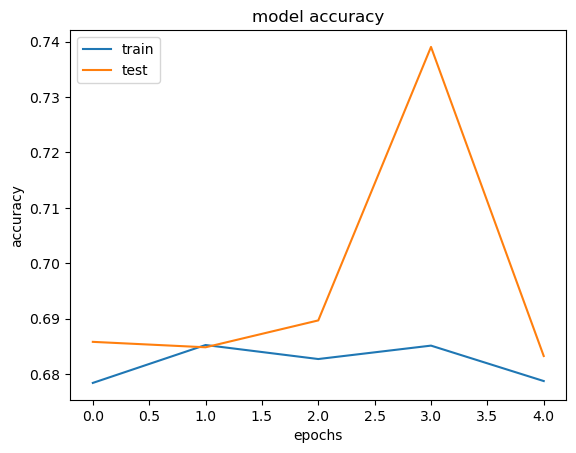

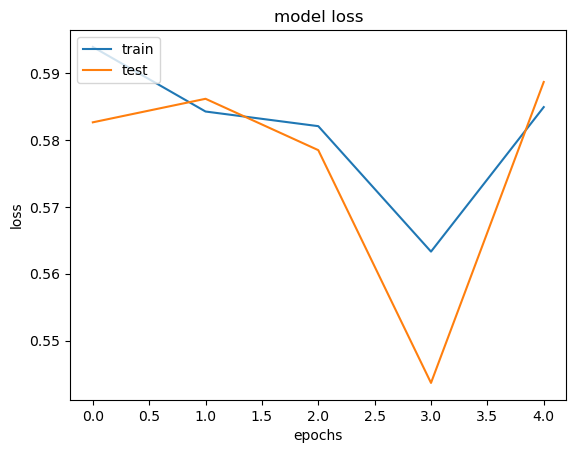

In [41]:
import matplotlib.pyplot as plt
plt.plot(simplernnmodelhistory.history['acc'])
plt.plot(simplernnmodelhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(simplernnmodelhistory.history['loss'])
plt.plot(simplernnmodelhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [43]:
simplernnmodel.save('simplernnfordepressiondetection_textualdata.keras')
simplernnmodel.save('simplernnfordepressiondetection_textualdata.h5')
